In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# API Key
from config import weather_api_key

In [3]:
# Build the basic URL
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create List of Cities

In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

# Pull weather data for cities

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                        "Lat": city_lat,
                        "Lng": city_lng,
                        "Max Temp": city_max_temp,
                        "Humidity": city_humidity,
                        "Cloudiness": city_clouds,
                        "Wind Speed": city_wind,
                        "Country": city_country,
                        "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | ilulissat
Processing Record 2 of Set 1 | saskylakh
Processing Record 3 of Set 1 | ribeira grande
Processing Record 4 of Set 1 | ponta do sol
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | alofi
Processing Record 7 of Set 1 | hermanus
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | tessaoua
Processing Record 11 of Set 1 | butaritari
Processing Record 12 of Set 1 | bonavista
Processing Record 13 of Set 1 | chokurdakh
Processing Record 14 of Set 1 | mahebourg
Processing Record 15 of Set 1 | puerto ayora
Processing Record 16 of Set 1 | hobart
Processing Record 17 of Set 1 | khatanga
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | port alfred
Processing Record 20 of Set 1 | inhambane
Processing Record 21 of Set 1 | manga
Processing Record 22 of Set 1 | mersing
Processing Record 23 of Set 1 

In [ ]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Fayaoue,-20.6500,166.5333,82.80,84,96,27.22,NC,2022-03-01 02:11:40
1,Ilulissat,69.2167,-51.1000,7.79,57,65,11.30,GL,2022-03-01 02:11:40
2,Havre-Saint-Pierre,50.2334,-63.5986,-6.14,90,6,8.97,CA,2022-03-01 02:09:41
3,Georgetown,5.4112,100.3354,78.75,80,95,4.68,MY,2022-03-01 02:08:05
4,Garowe,8.4054,48.4845,65.70,87,94,10.60,SO,2022-03-01 02:11:41
5,Leningradskiy,69.3833,178.4167,17.38,74,49,9.82,RU,2022-03-01 02:11:41
6,Mar Del Plata,-38.0023,-57.5575,55.85,52,5,10.76,AR,2022-03-01 02:08:50
7,Jamestown,42.0970,-79.2353,25.61,83,100,3.80,US,2022-03-01 02:09:03
8,Wenling,28.3669,121.3600,61.05,82,61,8.88,CN,2022-03-01 02:11:41
9,Chokurdakh,70.6333,147.9167,-7.91,98,97,4.56,RU,2022-03-01 02:11:42


In [ ]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=city_data_df[new_column_order]  
city_data_df 

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Fayaoue,NC,2022-03-01 02:11:40,-20.6500,166.5333,82.80,84,96,27.22
1,Ilulissat,GL,2022-03-01 02:11:40,69.2167,-51.1000,7.79,57,65,11.30
2,Havre-Saint-Pierre,CA,2022-03-01 02:09:41,50.2334,-63.5986,-6.14,90,6,8.97
3,Georgetown,MY,2022-03-01 02:08:05,5.4112,100.3354,78.75,80,95,4.68
4,Garowe,SO,2022-03-01 02:11:41,8.4054,48.4845,65.70,87,94,10.60
...,...,...,...,...,...,...,...,...,...
563,Damghan,IR,2022-03-01 02:26:36,36.1683,54.3480,43.59,61,81,1.66
564,Marquard,ZA,2022-03-01 02:26:36,-28.6645,27.4305,58.91,86,89,3.76
565,Ternate,ID,2022-03-01 02:26:36,0.8000,127.4000,83.84,69,78,2.86
566,Mayumba,GA,2022-03-01 02:26:37,-3.4320,10.6554,78.26,89,100,4.54


In [ ]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [4]:
city_data_df

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Fayaoue,NC,2022-03-01 02:11:40,-20.6500,166.5333,82.80,84,96,27.22
1,1,Ilulissat,GL,2022-03-01 02:11:40,69.2167,-51.1000,7.79,57,65,11.30
2,2,Havre-Saint-Pierre,CA,2022-03-01 02:09:41,50.2334,-63.5986,-6.14,90,6,8.97
3,3,Georgetown,MY,2022-03-01 02:08:05,5.4112,100.3354,78.75,80,95,4.68
4,4,Garowe,SO,2022-03-01 02:11:41,8.4054,48.4845,65.70,87,94,10.60
...,...,...,...,...,...,...,...,...,...,...
563,563,Damghan,IR,2022-03-01 02:26:36,36.1683,54.3480,43.59,61,81,1.66
564,564,Marquard,ZA,2022-03-01 02:26:36,-28.6645,27.4305,58.91,86,89,3.76
565,565,Ternate,ID,2022-03-01 02:26:36,0.8000,127.4000,83.84,69,78,2.86
566,566,Mayumba,GA,2022-03-01 02:26:37,-3.4320,10.6554,78.26,89,100,4.54


# STEM Plots

In [2]:
# quick read of saved data
# city_data_df = pd.read_csv("weather_data/cities.csv")

In [3]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

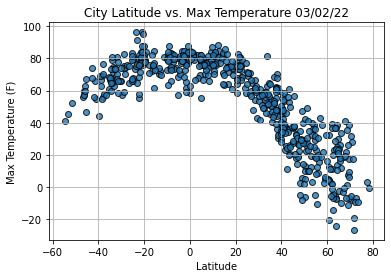

In [4]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")


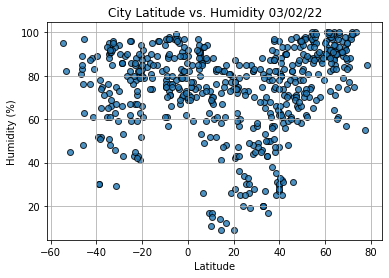

In [5]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")


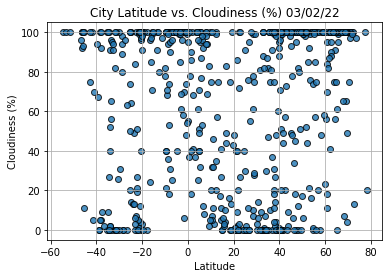

In [6]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")

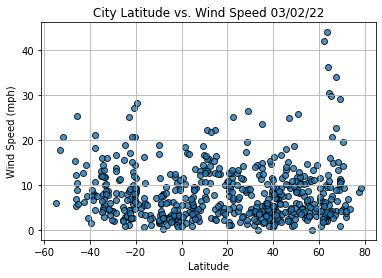

In [7]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Liner Regression Models

## Max Temp as a function of Latitude

In [12]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)) + " r= " + str(round(r_value,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)

In [10]:
index13 = city_data_df.loc[13]
index13

City_ID                        13
City                      Cayenne
Country                        GF
Date          2022-03-01 02:11:43
Lat                        4.9333
Lng                      -52.3333
Max Temp                    76.14
Humidity                       91
Cloudiness                    100
Wind Speed                   7.25
Name: 13, dtype: object

In [11]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,1,Ilulissat,GL,2022-03-01 02:11:40,69.2167,-51.1000,7.79,57,65,11.30
2,2,Havre-Saint-Pierre,CA,2022-03-01 02:09:41,50.2334,-63.5986,-6.14,90,6,8.97
3,3,Georgetown,MY,2022-03-01 02:08:05,5.4112,100.3354,78.75,80,95,4.68
4,4,Garowe,SO,2022-03-01 02:11:41,8.4054,48.4845,65.70,87,94,10.60
5,5,Leningradskiy,RU,2022-03-01 02:11:41,69.3833,178.4167,17.38,74,49,9.82


In [9]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

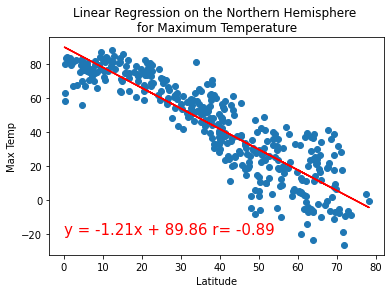

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature',
                       'Max Temp',(0,-20))

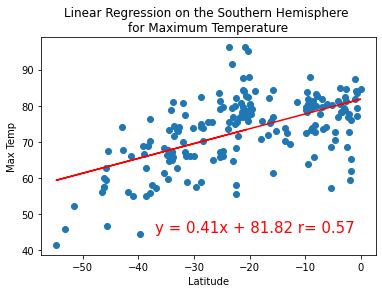

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',(-37,45))

## Percent humidity as a function of latitude

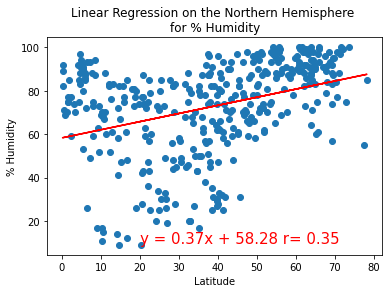

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(20,10))

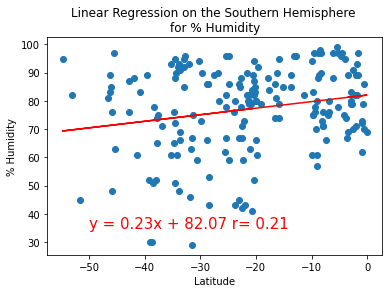

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,35))

## % Cloudiness as a function of latitude

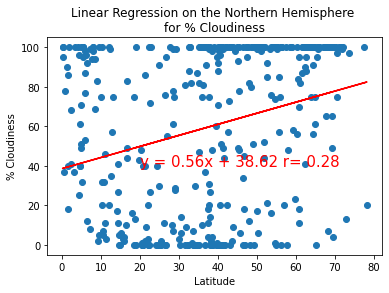

In [26]:
#Call the function for Northern hemisphere cloudiness
plot_linear_regression(northern_hemi_df["Lat"],
                        northern_hemi_df["Cloudiness"],
                        "Linear Regression on the Northern Hemisphere \nfor % Cloudiness",
                        "% Cloudiness",
                        (20,40))

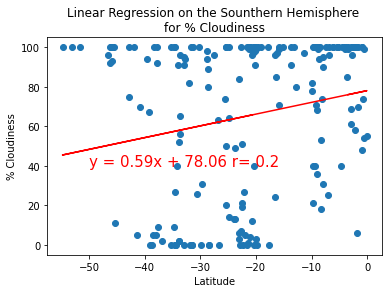

In [28]:
#Call the function for Southern hemisphere cloudiness
plot_linear_regression(southern_hemi_df["Lat"],
                        southern_hemi_df["Cloudiness"],
                        "Linear Regression on the Sounthern Hemisphere \nfor % Cloudiness",
                        "% Cloudiness",
                        (-50,40))

## Windspeed as a function of latitude

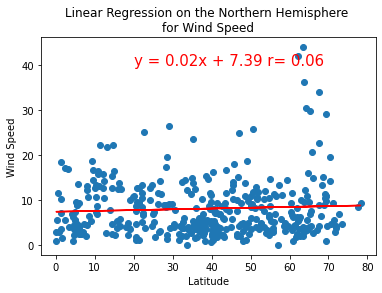

In [29]:
# Call the plotting function for the Northern Hemisphere Windspeeds
plot_linear_regression(northern_hemi_df["Lat"],
                        northern_hemi_df["Wind Speed"],
                        "Linear Regression on the Northern Hemisphere \nfor Wind Speed",
                        "Wind Speed",
                        (20,40))

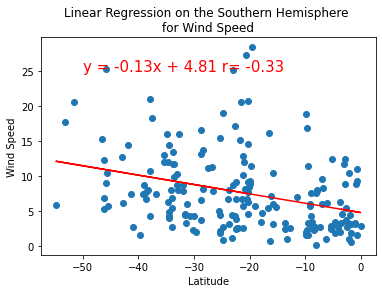

In [31]:
# Call the plotting function for the Southern Hemispher Windspeeds
plot_linear_regression(southern_hemi_df["Lat"],
                        southern_hemi_df["Wind Speed"],
                        "Linear Regression on the Southern Hemisphere \nfor Wind Speed",
                        "Wind Speed",
                        (-50,25))